In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

Primero vamos a leer los archivos para realizar un análisis expolaratorio de los datos.

In [5]:
hospitalizacion_train=pd.read_csv("hospitalizaciones_train.csv", delimiter=",", encoding="UTF-8")
hospitalizacion_test=pd.read_csv("hospitalizaciones_test.csv")

In [8]:
hospitalizacion_train.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [10]:
hospitalizacion_test.head(5)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324
2,2,radiotherapy,E,Dr John,7,45598,51-60,Other,Trauma,Moderate,None,3,No,5459.067882
3,2,gynecology,F,Dr Olivia,1,31132,21-30,Female,Trauma,Moderate,None,2,Yes,3987.033318
4,2,anesthesia,A,Dr John,7,125021,51-60,Female,Trauma,Extreme,Diabetes,2,No,4770.789695


In [11]:
hospitalizacion_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

In [12]:
hospitalizacion_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Available Extra Rooms in Hospital  90000 non-null  int64  
 1   Department                         90000 non-null  object 
 2   Ward_Facility_Code                 90000 non-null  object 
 3   doctor_name                        90000 non-null  object 
 4   staff_available                    90000 non-null  int64  
 5   patientid                          90000 non-null  int64  
 6   Age                                90000 non-null  object 
 7   gender                             90000 non-null  object 
 8   Type of Admission                  90000 non-null  object 
 9   Severity of Illness                90000 non-null  object 
 10  health_conditions                  90000 non-null  object 
 11  Visitors with Patient              90000 non-null  int

Renombramos las columnas.

In [13]:
nombre_train = ['Habitaciones_disponibles', 'Departamento_atencion', 'Codigo_habitacion', 'Nombre_doctor', 'Personal_disponible',
             'Paciente_id', 'Edad', 'Genero', 'Tipo_admision', 'Gravedad_enfermedad', 'Condiciones_salud', 'Visitantes_registrados',
              'Seguro_salud', 'Deposito_admision', 'Dias_estadia']

nombre_test = ['Habitaciones_disponibles', 'Departamento_atencion', 'Codigo_habitacion', 'Nombre_doctor', 'Personal_disponible',
             'Paciente_id', 'Edad', 'Genero', 'Tipo_admision', 'Gravedad_enfermedad', 'Condiciones_salud', 'Visitantes_registrados',
              'Seguro_salud', 'Deposito_admision']

In [14]:
hospitalizacion_train.columns= nombre_train
hospitalizacion_test.columns=nombre_test

In [15]:
hospitalizacion_train

,Habitaciones_disponibles,Departamento_atencion,Codigo_habitacion,Nombre_doctor,Personal_disponible,Paciente_id,Edad,Genero,Tipo_admision,Gravedad_enfermedad,Condiciones_salud,Visitantes_registrados,Seguro_salud,Deposito_admision,Dias_estadia
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,D,Dr Sarah,1,63105,31-40,Female,Trauma,Minor,Asthama,3,Yes,3902.291076,8
409996,5,gynecology,D,Dr Nathan,5,129292,21-30,Female,Trauma,Extreme,Other,4,No,4771.995223,9
409997,4,gynecology,D,Dr Sarah,9,11399,21-30,Female,Emergency,Minor,Asthama,4,Yes,3816.994210,9
409998,10,gynecology,D,Dr Olivia,10,75003,21-30,Female,Trauma,Moderate,Other,2,Yes,3841.577491,9


In [16]:
hospitalizacion_test.head()

,Habitaciones_disponibles,Departamento_atencion,Codigo_habitacion,Nombre_doctor,Personal_disponible,Paciente_id,Edad,Genero,Tipo_admision,Gravedad_enfermedad,Condiciones_salud,Visitantes_registrados,Seguro_salud,Deposito_admision
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324
2,2,radiotherapy,E,Dr John,7,45598,51-60,Other,Trauma,Moderate,None,3,No,5459.067882
3,2,gynecology,F,Dr Olivia,1,31132,21-30,Female,Trauma,Moderate,None,2,Yes,3987.033318
4,2,anesthesia,A,Dr John,7,125021,51-60,Female,Trauma,Extreme,Diabetes,2,No,4770.789695


Valores duplicados.

In [17]:
hospitalizacion_train.drop_duplicates(inplace=True)
hospitalizacion_test.drop_duplicates(inplace=True)


Hacemos la segmentacion para la variable 'Dias_estadia' con un corte de 8 días.

In [18]:
Dias_estadia_seg=[]

for row in hospitalizacion_train['Dias_estadia']:
    if (row <= 8):
        Dias_estadia_seg.append('Estadia_corta')
    else:
        Dias_estadia_seg.append('Estadia_larga')

hospitalizacion_train['Dias_estadia_seg']=Dias_estadia_seg

hospitalizacion_train.head()

,Habitaciones_disponibles,Departamento_atencion,Codigo_habitacion,Nombre_doctor,Personal_disponible,Paciente_id,Edad,Genero,Tipo_admision,Gravedad_enfermedad,Condiciones_salud,Visitantes_registrados,Seguro_salud,Deposito_admision,Dias_estadia,Dias_estadia_seg
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8,Estadia_corta
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9,Estadia_larga
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7,Estadia_corta
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8,Estadia_corta
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34,Estadia_larga


Creamos una nueva columna en base a 'Dias_estadia_seg' que tenga 0 si es estadia corta y 1 si es estadia larga. 

In [19]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

hospitalizacion_train['target']=labelencoder.fit_transform(hospitalizacion_train['Dias_estadia_seg'])
hospitalizacion_train.head()

,Habitaciones_disponibles,Departamento_atencion,Codigo_habitacion,Nombre_doctor,Personal_disponible,Paciente_id,Edad,Genero,Tipo_admision,Gravedad_enfermedad,Condiciones_salud,Visitantes_registrados,Seguro_salud,Deposito_admision,Dias_estadia,Dias_estadia_seg,target
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8,Estadia_corta,0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9,Estadia_larga,1
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7,Estadia_corta,0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8,Estadia_corta,0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34,Estadia_larga,1


borramos las columnas 'Dias_estadia' y 'Dias_estadia_seg'

In [20]:
hospitalizacion_train.drop(['Dias_estadia','Dias_estadia_seg'], axis=1, inplace=True)

realizamos los cambios en el dataset 'hospitalizacion_test'

In [29]:
hospitalizacion_train.drop_duplicates(inplace=True)
hospitalizacion_test.drop_duplicates(inplace=True)

hospitalizacion_test['target']=''

In [30]:
hospitalizacion_test.head()

,Habitaciones_disponibles,Departamento_atencion,Codigo_habitacion,Nombre_doctor,Personal_disponible,Paciente_id,Edad,Genero,Tipo_admision,Gravedad_enfermedad,Condiciones_salud,Visitantes_registrados,Seguro_salud,Deposito_admision,target
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225,
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324,
2,2,radiotherapy,E,Dr John,7,45598,51-60,Other,Trauma,Moderate,None,3,No,5459.067882,
3,2,gynecology,F,Dr Olivia,1,31132,21-30,Female,Trauma,Moderate,None,2,Yes,3987.033318,
4,2,anesthesia,A,Dr John,7,125021,51-60,Female,Trauma,Extreme,Diabetes,2,No,4770.789695,


Veamos un resumen de estadísticas para 'hozpitalizacion_train'

In [31]:
print(hospitalizacion_train.describe().round(2))

       Habitaciones_disponibles  Personal_disponible  Paciente_id  \
count                 410000.00            410000.00    410000.00   
mean                       3.64                 5.02     63095.94   
std                        2.70                 3.16     41686.18   
min                        0.00                 0.00     -3146.00   
25%                        2.00                 2.00     25405.00   
50%                        3.00                 5.00     57736.00   
75%                        4.00                 8.00    103278.25   
max                       24.00                10.00    134400.00   

       Visitantes_registrados  Deposito_admision     target  
count               410000.00          410000.00  410000.00  
mean                     3.55            4723.42       0.62  
std                      2.25            1047.42       0.48  
min                      0.00            1654.01       0.00  
25%                      2.00            4072.64       0.00  
50%   

array([[<AxesSubplot: title={'center': 'Habitaciones_disponibles'}>,
        <AxesSubplot: title={'center': 'Personal_disponible'}>],
       [<AxesSubplot: title={'center': 'Paciente_id'}>,
        <AxesSubplot: title={'center': 'Visitantes_registrados'}>],
       [<AxesSubplot: title={'center': 'Deposito_admision'}>,
        <AxesSubplot: title={'center': 'target'}>]], dtype=object)

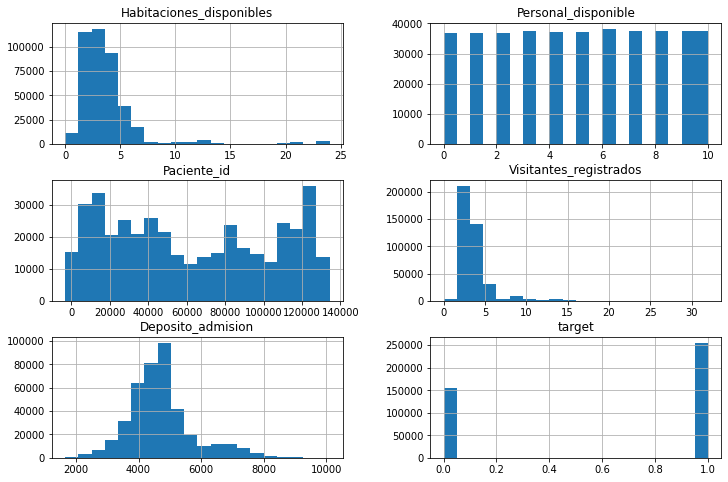

In [32]:
hospitalizacion_train.hist(figsize=(12,8),bins=20)



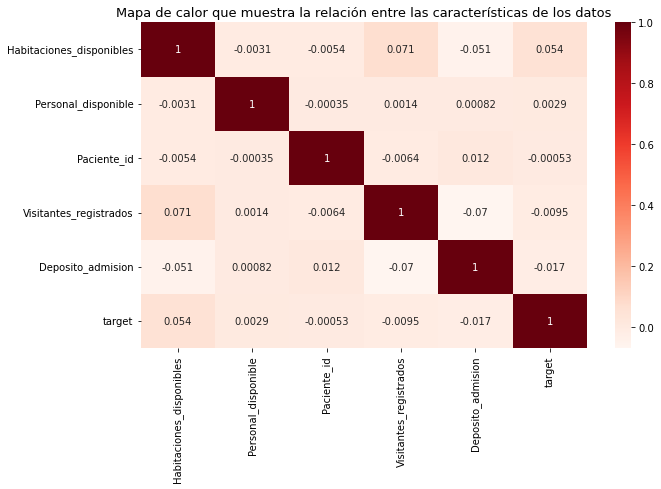

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(hospitalizacion_train.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Mapa de calor que muestra la relación entre las características de los datos',
         fontsize=13)
plt.show()


Como no hay correlaciones buenas entre las variables, vamos a implementar un modelo de clasificacion (K-Neaste Neighbords)

Primero graficamos la varaible target para ver su distribución.

<AxesSubplot: xlabel='target', ylabel='count'>

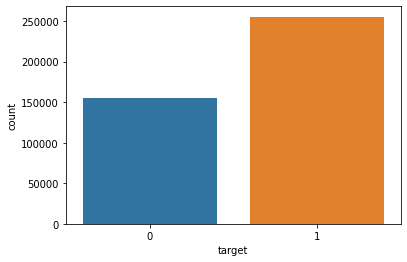

In [35]:
sns.countplot(x='target', data=hospitalizacion_train)

Vamos a escoger las variables X, y

In [163]:
X=hospitalizacion_train[['Habitaciones_disponibles','Personal_disponible','Deposito_admision']]
y=hospitalizacion_train.target

Separaramos el dataset en dos: train y test data

In [164]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #80% entrenamiento, 30% test

Hacemos escalado de datos

In [165]:
#Scaling 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

In [166]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(328000, 3) (82000, 3) (328000,) (82000,)


Construimos el modelo


In [183]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 701, metric='minkowski', p=1)


entrenando el modelo

In [184]:
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=701, p=1)

Predecimos la respuesta para el dataset test

In [185]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [186]:
from sklearn.metrics import confusion_matrix

matriz= confusion_matrix(y_test, y_pred)
print(f'Matrix confusion {matriz}')

Matrix confusion [[ 2479 28532]
 [ 2173 48816]]


In [187]:
#recall del modelo
from sklearn.metrics import recall_score

recalll = recall_score(y_test, y_pred, average= None)
print( f'El recall del modelo es {recalll}')

El recall del modelo es [0.07993938 0.95738296]


In [188]:
#calculo precision del modelo

from sklearn.metrics import precision_score
presicion= precision_score(y_test, y_pred)
print(f'Precisión del modelo:  {presicion}')

Precisión del modelo:  0.6311216838185861


In [189]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.08      0.14     31011
           1       0.63      0.96      0.76     50989

    accuracy                           0.63     82000
   macro avg       0.58      0.52      0.45     82000
weighted avg       0.59      0.63      0.53     82000



In [192]:
# new data
X_1=hospitalizacion_test[['Habitaciones_disponibles','Personal_disponible', 'Deposito_admision']]


In [193]:
y_pred_1 = knn.predict(X_1)

In [194]:
pred=pd.DataFrame(y_pred_1, columns=['pred'], index=None)

In [195]:
pred.to_csv('CamiiloP14.csv',index=False)